### Lecture 5: Implementing a simple implicit scheme

In [1]:
%pylab inline
import numpy as np

Populating the interactive namespace from numpy and matplotlib


Consider the following equation:

$$ f_{xx} = -1 $$

$$ f(0) = 1, \quad f(1) = 0 $$

(Steady state heat equation with a source term (-1 term) and constant temperature at the boundaries (at x = 0, and x = 1))

** NOTE 1: ** Last time we used periodic boundary conditions. This time we will "extend" our x-domain by adding two extra points, one at the left and one at the right boundary.

Apply a central difference scheme to approximate the second derivative:

$$ (f_{j+1} - 2f_j + f_{j-1})/\Delta x^2 = - 1$$

**NOTE 2:** Let's say we know $f_0$ which is the value at the left boundary, we don't know $f_1$ or $f_2$ so therefore this is an implicit scheme, and we need to solve a system of equations to get the solution. 

We want to rewrite the above as a matrix equation, namely:

$$ A * f = - 1 $$ where $A$ is a matrix and $f$ is a vector

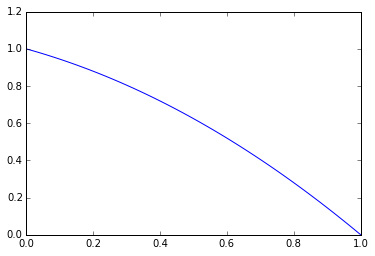

In [4]:
# Code to implement the above

# Set the number of grid points
J = 100
lboundary = 1
rboundary = 0
dx = 1/(J+1)

# Create our x domain array
x = np.linspace(0,1,J+2) #+2 for our extra boundary points

# Now lets define our matrix A
e_mp2 = np.ones(J+2)
e_mp1 = np.ones(J+1)
A = 1/dx**2 * (np.diag(e_mp1,-1) - 2*np.diag(e_mp2,0) + np.diag(e_mp1,1))
# constructing our matrix with three "diagonal rows"
A[0,0] = 1 # Left boundary extended point
A[0,1] = 0
A[-1,-1] = 1 # Right boundary extended point
A[-1,-2] = 0
# for a vector or matrix, M[-1] refers to the last entry in M

#define f vector
f = -np.ones(x.shape)
f[0] = lboundary
f[-1] = rboundary

# Now we solve the matrix equation and plot
solution = np.linalg.solve(A,f)
plt.plot(x,solution)